In [ ]:
# cross-correlation 

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate, square, sawtooth

# Generate time vector
t = np.linspace(0, 1, 1000, endpoint=False)

# Generate a square wave and a triangular wave
square_wave = square(2 * np.pi * 5 * t)  # 5 Hz square wave
triangular_wave = sawtooth(2 * np.pi * 5 * t, width=0.5)  # 5 Hz triangular wave

# Compute cross-correlation
correlation = correlate(square_wave, triangular_wave, mode='full')

# Time axis for correlation
lags = np.arange(-len(t) + 1, len(t))

# Plot signals and correlation
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

axs[0].plot(t, square_wave, label="Square Wave", color='b')
axs[0].set_title("Square Wave")
axs[0].grid()
axs[0].legend()

axs[1].plot(t, triangular_wave, label="Triangular Wave", color='r')
axs[1].set_title("Triangular Wave")
axs[1].grid()
axs[1].legend()

axs[2].plot(lags, correlation, label="Cross-Correlation", color='g')
axs[2].set_title("Cross-Correlation of Square and Triangular Wave")
axs[2].grid()
axs[2].legend()

plt.tight_layout()
plt.show()

In [ ]:
# FM signal
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

# Load an audio file (message signal)
sampling_rate, message_signal = wav.read("sine_wave_440Hz.wav")

# Normalize the message signal (if stereo, convert to mono)
if len(message_signal.shape) > 1:
    message_signal = message_signal[:, 0]  # Use one channel
message_signal = message_signal / np.max(np.abs(message_signal))  # Normalize

# Time vector
t = np.arange(len(message_signal)) / sampling_rate

# Carrier parameters
carrier_freq = 5000  # Carrier frequency (Hz)
mod_index = 5         # Modulation index

# Generate carrier signal
carrier_signal = np.cos(2 * np.pi * carrier_freq * t)

# Perform FM modulation
fm_signal = np.cos(2 * np.pi * carrier_freq * t + mod_index * np.cumsum(message_signal) / sampling_rate)

# Plot the signals
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

axs[0].plot(t[:1000], message_signal[:1000], label="Message Signal", color='b')
axs[0].set_title("Original Message Signal")
axs[0].set_xlabel("Time [s]")
axs[0].set_ylabel("Amplitude")
axs[0].legend()
axs[0].grid()

axs[1].plot(t[:1000], carrier_signal[:1000], label="Carrier Signal", color='r')
axs[1].set_title("Carrier Signal")
axs[1].set_xlabel("Time [s]")
axs[1].set_ylabel("Amplitude")
axs[1].legend()
axs[1].grid()

axs[2].plot(t[:1000], fm_signal[:1000], label="FM Modulated Signal", color='g')
axs[2].set_title("FM Modulated Signal")
axs[2].set_xlabel("Time [s]")
axs[2].set_ylabel("Amplitude")
axs[2].legend()
axs[2].grid()

plt.tight_layout()
plt.show()


In [ ]:
# Signal sampling and reconstruction

import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from scipy.signal import resample

# Load the audio file
sampling_rate, audio_signal = wav.read("short_audio.wav")

# Convert stereo to mono if necessary
if len(audio_signal.shape) > 1:
    audio_signal = audio_signal[:, 0]  # Take one channel

# Normalize the audio signal
audio_signal = audio_signal / np.max(np.abs(audio_signal))

# Get the highest frequency present (assume Nyquist rate)
nyquist_rate = sampling_rate / 2  
sampling_freq = 2 * nyquist_rate  # Follow Nyquist rate
sampling_interval = int(sampling_rate / sampling_freq)

# Sample the signal
sampled_indices = np.arange(0, len(audio_signal), sampling_interval)
sampled_signal = audio_signal[sampled_indices]
sampled_time = sampled_indices / sampling_rate

# Reconstruct the signal using sinc interpolation
reconstructed_signal = resample(sampled_signal, len(audio_signal))

# Time vectors
t = np.arange(len(audio_signal)) / sampling_rate

# Plot the original, sampled, and reconstructed signals
fig, axs = plt.subplots(3, 1, figsize=(12, 8))

# Original signal
axs[0].plot(t[:1000], audio_signal[:1000], label="Original Signal", color='b')
axs[0].set_title("Original Audio Signal")
axs[0].set_xlabel("Time [s]")
axs[0].set_ylabel("Amplitude")
axs[0].legend()
axs[0].grid()

# Sampled signal
axs[1].stem(sampled_time[:50], sampled_signal[:50], linefmt='r-', markerfmt='ro', basefmt=" ")
axs[1].set_title("Sampled Signal (Nyquist Rate)")
axs[1].set_xlabel("Time [s]")
axs[1].set_ylabel("Amplitude")
axs[1].legend(["Sampled Signal"])
axs[1].grid()

# Reconstructed signal
axs[2].plot(t[:1000], reconstructed_signal[:1000], label="Reconstructed Signal", color='g')
axs[2].set_title("Reconstructed Signal from Samples")
axs[2].set_xlabel("Time [s]")
axs[2].set_ylabel("Amplitude")
axs[2].legend()
axs[2].grid()

plt.tight_layout()
plt.show()


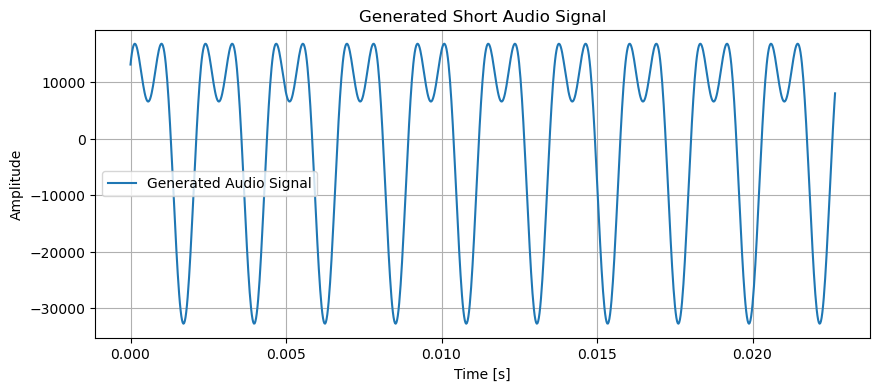

In [1]:
# Save your own audio file first
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

# Parameters
sampling_rate = 44100  # 44.1 kHz standard audio sampling rate
duration = 1  # 1 second
freq1 = 440  # Sine wave at 440 Hz (A4)
freq2 = 880  # Cosine wave at 880 Hz (A5)

# Time vector
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate signals
sine_wave = np.sin(2 * np.pi * freq1 * t)
cosine_wave = np.cos(2 * np.pi * freq2 * t)

# Combine waves (to create a more complex signal)
audio_signal = 0.6 * sine_wave + 0.4 * cosine_wave

# Normalize to 16-bit range
audio_signal = (audio_signal * 32767).astype(np.int16)

# Save as WAV file
wav.write("short_audio.wav", sampling_rate, audio_signal)

# Plot the signal
plt.figure(figsize=(10, 4))
plt.plot(t[:1000], audio_signal[:1000], label="Generated Audio Signal")
plt.title("Generated Short Audio Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from scipy.signal import resample

# Load the audio file
sampling_rate, audio_signal = wav.read("short_audio.wav")

# Convert stereo to mono if necessary
if len(audio_signal.shape) > 1:
    audio_signal = audio_signal[:, 0]  # Use one channel

# Normalize the signal
audio_signal = audio_signal / np.max(np.abs(audio_signal))

# Time vector for original signal
t = np.arange(len(audio_signal)) / sampling_rate

# Define Nyquist rate and sampling frequency
nyquist_rate = sampling_rate / 2  
sampling_freq = 2 * nyquist_rate  # Nyquist theorem: Fs >= 2*Fmax
sampling_interval = int(sampling_rate / sampling_freq)

# Sample the signal
sampled_indices = np.arange(0, len(audio_signal), sampling_interval)
sampled_signal = audio_signal[sampled_indices]
sampled_time = sampled_indices / sampling_rate

# Reconstruct the signal using sinc interpolation
reconstructed_signal = resample(sampled_signal, len(audio_signal))

# Convert signals to dB scale (avoid log(0) issues)
def to_dB(signal):
    return 20 * np.log10(np.abs(signal) + 1e-6)  # Adding small value to avoid log(0)

audio_signal_dB = to_dB(audio_signal)
sampled_signal_dB = to_dB(sampled_signal)
reconstructed_signal_dB = to_dB(reconstructed_signal)

# Compute correlation between original and reconstructed signal
correlation = np.corrcoef(audio_signal, reconstructed_signal)[0, 1]

# Plot everything
fig, axs = plt.subplots(4, 1, figsize=(12, 12))

# Original signal
axs[0].plot(t[:1000], audio_signal_dB[:1000], label="Original Signal (dB)", color='b')
axs[0].set_title("Original Signal in dB Scale")
axs[0].set_xlabel("Time [s]")
axs[0].set_ylabel("Amplitude (dB)")
axs[0].legend()
axs[0].grid()

# Sampled signal
axs[1].stem(sampled_time[:50], sampled_signal_dB[:50], linefmt='r-', markerfmt='ro', basefmt=" ")
axs[1].set_title("Sampled Signal (dB) - Following Nyquist Rate")
axs[1].set_xlabel("Time [s]")
axs[1].set_ylabel("Amplitude (dB)")
axs[1].legend(["Sampled Signal"])
axs[1].grid()

# Reconstructed signal
axs[2].plot(t[:1000], reconstructed_signal_dB[:1000], label="Reconstructed Signal (dB)", color='g')
axs[2].set_title("Reconstructed Signal from Samples in dB Scale")
axs[2].set_xlabel("Time [s]")
axs[2].set_ylabel("Amplitude (dB)")
axs[2].legend()
axs[2].grid()

# Correlation Visualization
axs[3].plot(t[:1000], audio_signal[:1000], label="Original", color='b', linestyle='dotted')
axs[3].plot(t[:1000], reconstructed_signal[:1000], label="Reconstructed", color='g', linestyle='dashed')
axs[3].set_title(f"Correlation Between Original & Reconstructed Signal: {correlation:.4f}")
axs[3].set_xlabel("Time [s]")
axs[3].set_ylabel("Amplitude")
axs[3].legend()
axs[3].grid()

plt.tight_layout()
plt.show()


In [ ]:
# FFT 
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

# Load audio file
sampling_rate, audio_signal = wav.read("short_audio.wav")

# Convert to mono if stereo
if len(audio_signal.shape) > 1:
    audio_signal = audio_signal.mean(axis=1)

# Normalize the signal
audio_signal = audio_signal / np.max(np.abs(audio_signal))

# Compute FFT
N = len(audio_signal)
freqs = np.fft.fftfreq(N, 1/sampling_rate)  # Frequency axis
fft_values = np.fft.fft(audio_signal)       # Compute FFT

# Compute magnitude and phase
magnitude = np.abs(fft_values)  
phase = np.angle(fft_values) 

# Convert magnitude to dB scale
magnitude_db = 20 * np.log10(magnitude + 1e-6)  # Avoid log(0) issue

# Plot original waveform
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
time = np.linspace(0, N/sampling_rate, N)
plt.plot(time, audio_signal, color='blue')
plt.title("Original Audio Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()

# Plot FFT Magnitude (Linear Scale)
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(freqs[:N//2], magnitude[:N//2], color='red')
plt.title("FFT Magnitude Spectrum (Linear Scale)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.grid()

# Plot FFT Magnitude (dB Scale)
plt.subplot(2, 2, 2)
plt.plot(freqs[:N//2], magnitude_db[:N//2], color='red')
plt.title("FFT Magnitude Spectrum (dB Scale)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude (dB)")
plt.grid()

# Plot FFT Phase Spectrum (Linear Scale)
plt.subplot(2, 2, 3)
plt.plot(freqs[:N//2], phase[:N//2], color='green')
plt.title("FFT Phase Spectrum (Linear Scale)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Phase [radians]")
plt.grid()

# Plot FFT Phase Spectrum (dB Scale)
plt.subplot(2, 2, 4)
plt.plot(freqs[:N//2], 20*np.log10(np.abs(phase[:N//2]) + 1e-6), color='green')
plt.title("FFT Phase Spectrum (dB Scale)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Phase (dB)")
plt.grid()

# Show all plots
plt.tight_layout()
plt.show()


In [ ]:
# FFT 2
# Fourier Transform
import numpy as np
import matplotlib.pyplot as plt
import wave
import struct

# Parameters
frequency = 440.0        # Frequency of the sine wave (Hz)
duration = 1.0           # Duration in seconds
sampling_rate = 44100    # Sampling rate (samples per second)
amplitude = 32767        # Amplitude for 16-bit PCM

# Time vector
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate sine wave
sine_wave = amplitude * np.sin(2 * np.pi * frequency * t)

# Save as WAV file
output_file = 'sine_wave_440Hz.wav'
with wave.open(output_file, 'w') as wav_file:
    n_channels = 1
    sampwidth = 2  # 2 bytes for 16-bit audio
    n_frames = len(sine_wave)
    comptype = 'NONE'
    compname = 'not compressed'
    wav_file.setparams((n_channels, sampwidth, sampling_rate, n_frames, comptype, compname))
    for sample in sine_wave:
        wav_file.writeframes(struct.pack('<h', int(sample)))

# Plotting the waveform
plt.figure(figsize=(12, 6))

# Time-domain plot
plt.subplot(2, 1, 1)
plt.plot(t[:1000], sine_wave[:1000], color='blue')
plt.title('Time-Domain Waveform of 440 Hz Sine Wave')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# Frequency-domain analysis using FFT
n = len(sine_wave)
freq = np.fft.fftfreq(n, d=1/sampling_rate)
fft_magnitude = np.abs(np.fft.fft(sine_wave))

# Only take the positive half of the spectrum
positive_freqs = freq[:n // 2]
positive_magnitude = fft_magnitude[:n // 2]

# Magnitude Spectrum (Linear Scale)
plt.subplot(2, 1, 2)
plt.plot(positive_freqs, positive_magnitude, color='red')
plt.title('Magnitude Spectrum (Linear Scale)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(0, 2000)  # Focus on frequencies up to 2000 Hz
plt.grid(True)

plt.tight_layout()
plt.show()
